In [2]:
# import librairies
import pandas as pd, matplotlib.pyplot as plt, re, seaborn as sns

from textblob import TextBlob
from wordcloud import WordCloud

In [3]:
# Set the maximum column width to a large number to prevent truncation
pd.set_option('display.max_colwidth', None)

In [4]:
# Read the csv file from directory
df = pd.read_csv(r"C:\Users\Gee Oc\Downloads\data\BA_reviews.csv")

In [5]:
# display the first and last rows of the dfset
df

,reviews
0,"✅ Trip Verified | Booked online months ago and the only hitch was replacement aircraft meaning chosen seats were different. I was informed of this prior to departure so could amend. Bag drop at MAN T3 wasn't smooth but I suspect that was MAN fault. Shuttle boarding was slow and delayed meaning a rush at LHR T5. The flight to CPT was full but we left more or less on time. The cabin was clean and PE was what we expected, sufficient leg and arm room plus a few little perks with drinks. Only complaint is the seats actually recline too far. Staff were very good during the first few hours of service, especially George. Food was quite tasty but one option wasn't loaded. Breakfast was also quite tasty and we landed on time. The fly in the ointment is both our cases arrived late on the carousel and only later did we notice both had been broken into, likely at CPT. All in all a pleasant surprise."
1,"✅ Trip Verified | The flight was on time. The crew were polite. It was the same story on my outward flight. I find that BA in Europe is generally pretty good, though I regret that they have substituted Prosecco for Champagne on the list of drinks you can buy in economy! So many complaints about BA and other airlines revolve around lost luggage that I never check in bags, even for long trips."
2,"Not Verified | Angry, disappointed, and unsatisfied. My route was from London to Atlanta. My suitcase was not boarded, therefore not landed with me. For both comfort and safety reason, a bag always fly with its passenger and that did not happen. Claims and few phone calls were made by desk assistants who answered my questions unprofessionally and miserably. Certainly, I was left with nothing but my backpack which contained not more than few snacks. Neither clothes nor anything else was ever provided as an apology. Meanwhile, I was also told that my bag would have been delivered through the next 24 hours which also did not happen. British Airways is a great airline to fly with but its organization, when it comes to customer service, is poor and uncertain. Still waiting for my bag."
3,"✅ Trip Verified | As an infrequent flyer, British Airways was always my first choice. With some reassurance and comfort of service, quality, luggage allowance etc. In fact I’ve never flown with the budget airlines. My most recent flight has now changed my view and causes me to reflect on what am I actually getting for my money and is BA what they once were. While the flights were around an hour delayed both ways, the cabin and ground staff service were ok. It is the facilities (or lack of) that I am most disappointed by. The flight was Approx 4 and a half hours and the only thing offered was a half cup of water that was poured out and a bite sized banana slice of cake. In fact on my return journey I wasn’t even offered the water! To top it off BA no longer have a media screen from which you can select something to pass the time away. There wasn’t even the obligatory flight journey. The WiFi was poor. I couldn’t even access the shop. However, for a fee so much more was available. This explains BAs record profit of £1.52bn. So, the question is, what am I paying for? I will now for sure opt for the budget airlines. They are transparent with what they offer and what you have to pay for, which I can decide to choose or not. As BA now stands for Basic Airways I’ll go elsewhere and get basic for cheaper."
4,"Not Verified | A totally unremarkable flight, on time, as comfortable as European configuration goes. No catering due to the storm - effect greatly exaggerated. This was advised by email, and a euro 15 was provided - not easy to use - but lounge made up for this loss."
...,...
1995,"✅ Verified Review | The flight started in the First Class Concorde lounge at T5. It is certainly showing signs of wear with tacky material hanging down around some of the seats. The seat cushions need refilling. The general ambiance is quite good. A refurbishment is long overdue. Th

In [6]:
# Total numbers of reviews collected
total_reviews = df.shape[0]
print(f'The total number of reveiws collected is {total_reviews}')

The total number of reveiws collected is 2000


In [7]:
# strip unwanted space from the reviews
df['reviews'] = df['reviews'].str.strip()

In [8]:
# replace the listed words with an empty space
df = df.replace(['✅ Verified Review |','✅ Trip Verified |', '❎ Unverified |', '❎ Not Verified |', 'Not Verified |'],'', regex=True)

In [9]:
# strip off the | from the reviews
df['reviews'] = df['reviews'].str.strip('|')

In [10]:
# Sentiment Analysis
df['Sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [11]:
df.head()

,reviews,Sentiment
0,"Booked online months ago and the only hitch was replacement aircraft meaning chosen seats were different. I was informed of this prior to departure so could amend. Bag drop at MAN T3 wasn't smooth but I suspect that was MAN fault. Shuttle boarding was slow and delayed meaning a rush at LHR T5. The flight to CPT was full but we left more or less on time. The cabin was clean and PE was what we expected, sufficient leg and arm room plus a few little perks with drinks. Only complaint is the seats actually recline too far. Staff were very good during the first few hours of service, especially George. Food was quite tasty but one option wasn't loaded. Breakfast was also quite tasty and we landed on time. The fly in the ointment is both our cases arrived late on the carousel and only later did we notice both had been broken into, likely at CPT. All in all a pleasant surprise.",0.080565
1,"The flight was on time. The crew were polite. It was the same story on my outward flight. I find that BA in Europe is generally pretty good, though I regret that they have substituted Prosecco for Champagne on the list of drinks you can buy in economy! So many complaints about BA and other airlines revolve around lost luggage that I never check in bags, even for long trips.",0.241667
2,"Angry, disappointed, and unsatisfied. My route was from London to Atlanta. My suitcase was not boarded, therefore not landed with me. For both comfort and safety reason, a bag always fly with its passenger and that did not happen. Claims and few phone calls were made by desk assistants who answered my questions unprofessionally and miserably. Certainly, I was left with nothing but my backpack which contained not more than few snacks. Neither clothes nor anything else was ever provided as an apology. Meanwhile, I was also told that my bag would have been delivered through the next 24 hours which also did not happen. British Airways is a great airline to fly with but its organization, when it comes to customer service, is poor and uncertain. Still waiting for my bag.",0.024176
3,"As an infrequent flyer, British Airways was always my first choice. With some reassurance and comfort of service, quality, luggage allowance etc. In fact I’ve never flown with the budget airlines. My most recent flight has now changed my view and causes me to reflect on what am I actually getting for my money and is BA what they once were. While the flights were around an hour delayed both ways, the cabin and ground staff service were ok. It is the facilities (or lack of) that I am most disappointed by. The flight was Approx 4 and a half hours and the only thing offered was a half cup of water that was poured out and a bite sized banana slice of cake. In fact on my return journey I wasn’t even offered the water! To top it off BA no longer have a media screen from which you can select something to pass the time away. There wasn’t even the obligatory flight journey. The WiFi was poor. I couldn’t even access the shop. However, for a fee so much more was available. This explains BAs record profit of £1.52bn. So, the question is, what am I paying for? I will now for sure opt for the budget airlines. They are transparent with what they offer and what you have to pay for, which I can decide to choose or not. As BA now stands for Basic Airways I’ll go elsewhere and get basic for cheaper.",0.118056
4,"A totally unremarkable flight, on time, as comfortable as European configuration goes. No catering due to the storm - effect greatly exaggerated. This was advised by email, and a euro 15 was provided - not easy to use - but lounge made up for this loss.",-0.073611


In [12]:
# Sentiment Distribution
sentiment_review = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral').value_counts()

In [13]:
print(sentiment_review)

Sentiment
Positive    1302
Negative     685
Neutral       13
Name: count, dtype: int64


In [24]:
plt.style.use('ggplot')

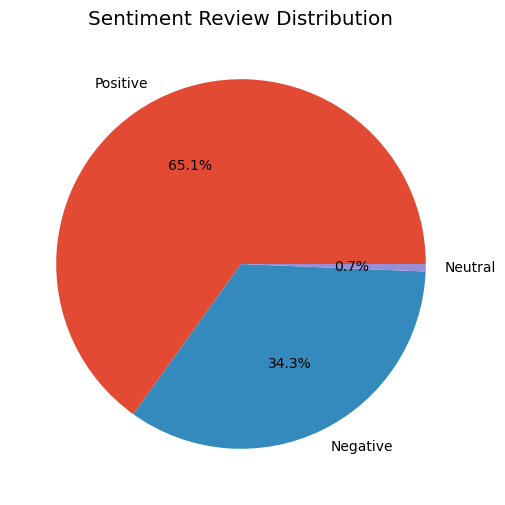

In [25]:
# Data visualization
plt.figure(figsize=(10, 6))
sentiment_review.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Review Distribution')
plt.ylabel('Frequency Distribution')
plt.axis('off')
plt.show()

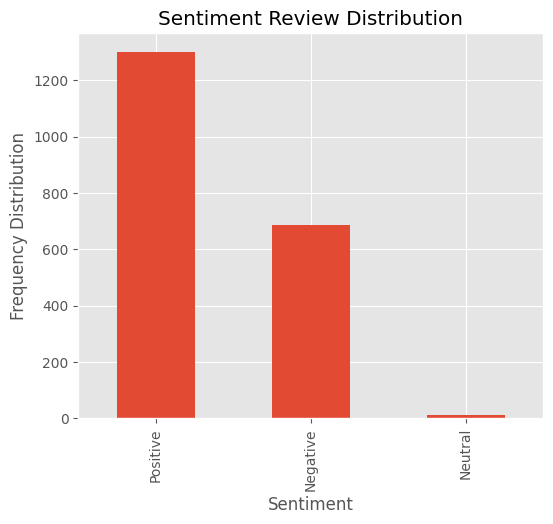

In [26]:
# Data visualization
plt.figure(figsize=(6, 5))
sentiment_review.plot(kind='bar')
plt.title('Sentiment Review Distribution')
plt.ylabel('Frequency Distribution')
plt.show()

In [16]:
# Keyword Extraction
reviews_text = ' '.join(df['reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

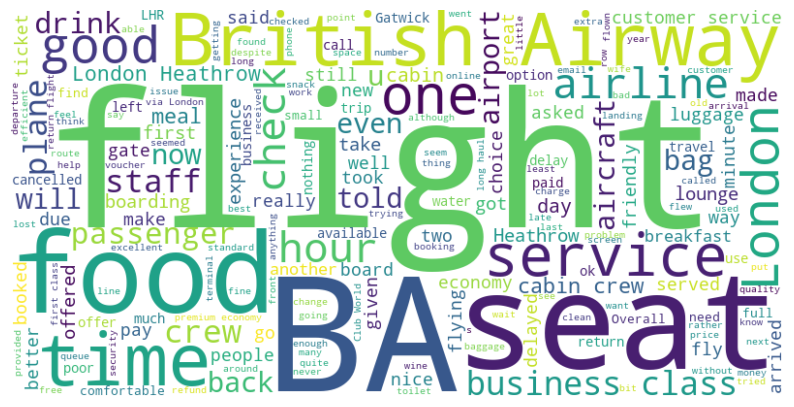

In [27]:
# Data visualization
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
# Extract the word frequencies from the word cloud
word_frequencies = wordcloud.words_

In [19]:
# Convert word frequencies to a DataFrame for easier manipulation
word_freq_df = pd.DataFrame(list(word_frequencies.items()), columns=['Word', 'Frequency'])

In [20]:
# Sort the words by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

In [21]:
word_freq_df['Word'] = word_freq_df['Word'].str.title()

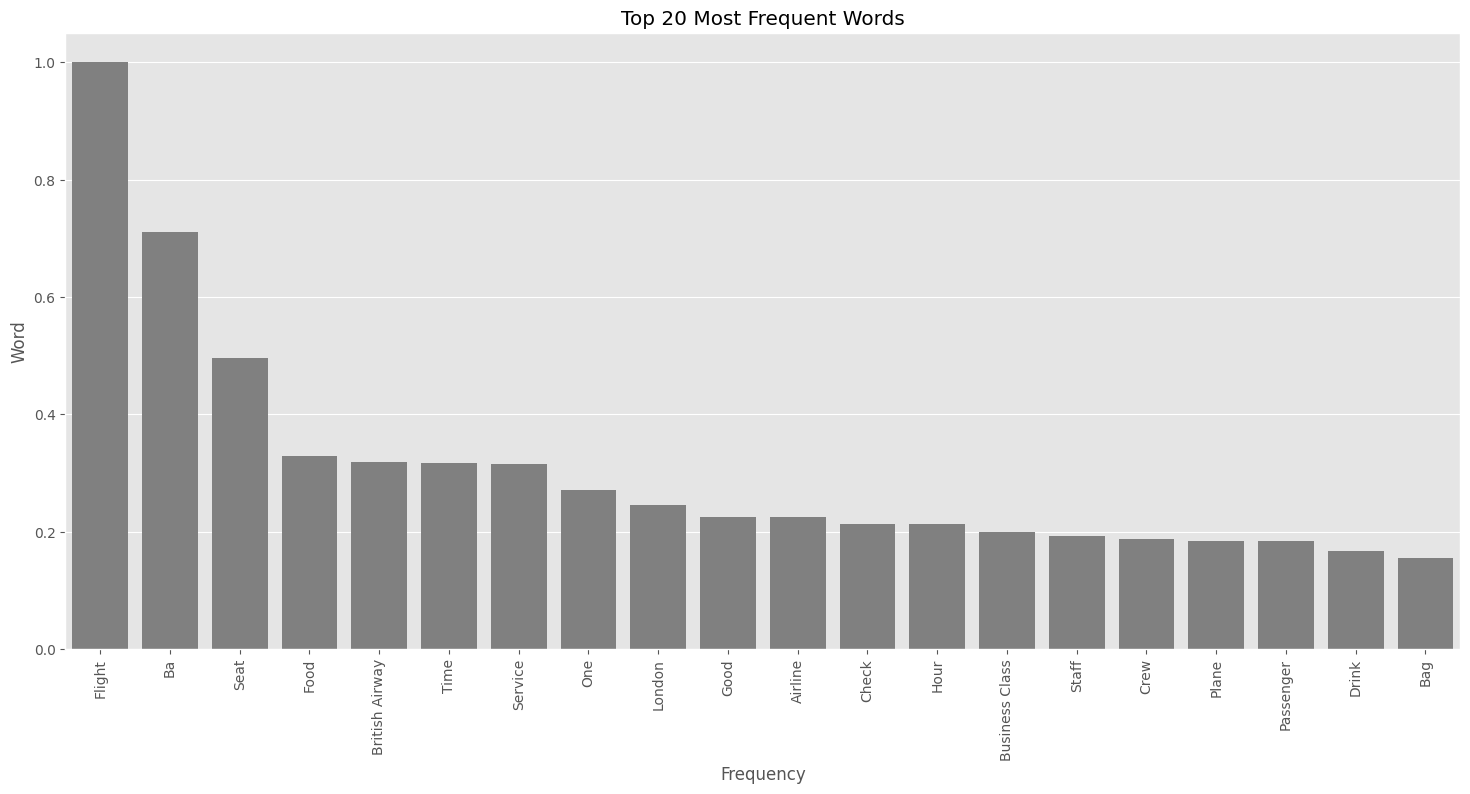

In [28]:
plt.figure(figsize=(18,8))
sns.barplot(word_freq_df.head(20), x='Word', y='Frequency', color='gray')
plt.title('Most Word')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=90)  # Set rotation to 90 degrees for vertical text
# plt.gca().invert_yaxis()  # Invert the y-axis to show the most frequent words at the top
plt.show()

In [29]:
# Create summary statistics
average_sentiment = df['Sentiment'].mean()
review_length = df['reviews'].apply(len).mean()

In [30]:
# Print summary statistics
print(f'Average Sentiment: {average_sentiment:.2f}')
print(f'Average Review Length: {review_length:.2f} characters')

Average Sentiment: 0.07
Average Review Length: 903.47 characters


### PowerPoint Presentation

In [27]:
from pptx import Presentation
from pptx.util import Inches
from pptx.enum.text import PP_ALIGN

In [28]:
# Create a new presentation
prs = Presentation()

In [29]:
# Slide 1: Title Slide
slide_1 = prs.slides.add_slide(prs.slide_layouts[0])
title = slide_1.shapes.title
title.text = "Customer Reviews Analysis"
subtitle = slide_1.placeholders[1]
subtitle.text = "Date: [Insert Date]"

In [30]:
# Slide 2: Sentiment Analysis
slide_2 = prs.slides.add_slide(prs.slide_layouts[5])
title = slide_2.shapes.title
title.text = "Sentiment Analysis"
content = slide_2.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(4))
text_frame = content.text_frame
text_frame.text = "Sentiment Distribution"
for sentiment, count in sentiment_review.items():
    p = text_frame.add_paragraph()
    p.text = f"{sentiment}: {count} reviews"
    p.alignment = PP_ALIGN.LEFT

In [31]:
# Slide 3: Keyword Extraction
slide_3 = prs.slides.add_slide(prs.slide_layouts[5])
title = slide_3.shapes.title
title.text = "Keyword Extraction"
content = slide_3.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(4))
text_frame = content.text_frame
text_frame.text = "Common Keywords in Reviews"

In [32]:
# Slide 4: Summary Statistics
slide_4 = prs.slides.add_slide(prs.slide_layouts[5])
title = slide_4.shapes.title
title.text = "Summary Statistics"
content = slide_4.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(4))
text_frame = content.text_frame
text_frame.text = "Summary Metrics"
p = text_frame.add_paragraph()
p.text = f"Average Sentiment: {average_sentiment:.2f}"
p.alignment = PP_ALIGN.LEFT
p = text_frame.add_paragraph()
p.text = f"Average Review Length: {review_length:.2f} characters"
p.alignment = PP_ALIGN.LEFT

In [34]:
# Save the PowerPoint presentation
# prs.save(r'C:\Users\Gee Oc\Downloads\data\customer_reviews_analysis.pptx')